In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
cd /content/drive/My Drive/machine_learning_cl/Forward_Propagation_NeuralNetworks

/content/drive/My Drive/machine_learning_cl/Forward_Propagation_NeuralNetworks


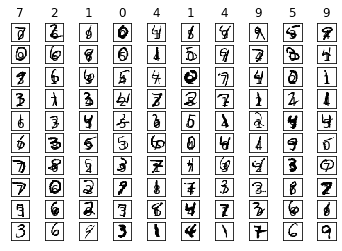

In [0]:
import matplotlib.pyplot as plt
import numpy as np

file_data   = "mnist_test.csv"
handle_file = open(file_data, "r")
data        = handle_file.readlines()
handle_file.close()

size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_image   = len(data)
count       = 0     # count for the number of images

#
# make a matrix each column of which represents an images in a vector form 
#
list_image  = np.empty((size_row * size_col, num_image), dtype=float)
list_label  = np.empty(num_image, dtype=int)

for line in data:

    line_data   = line.split(',')
    label       = line_data[0] 
    im_vector   = np.asfarray(line_data[1:]) # Return an array converted to a float type.

    list_label[count]       = label
    list_image[:, count]    = im_vector    

    count += 1

# 
# plot first 100 images out of 10,000 with their labels
# 
f1 = plt.figure(1)

for i in range(100): #list 추가를 이렇게 할 수도 있다.

    label       = list_label[i]
    im_vector   = list_image[:, i]
    im_matrix   = im_vector.reshape((size_row, size_col))

    plt.subplot(10, 10, i+1) # subplot(nrows, ncols, index, **kwargs)
    plt.title(label)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None') # Display data as an image; i.e. on a 2D regular raster.

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()


#caculate the avearage image

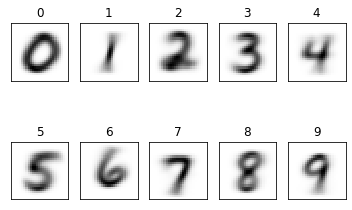

In [12]:
f2 = plt.figure(1)
sum_imvector  = np.zeros((size_row * size_col, 10), dtype=float)
sum_label  = np.zeros(10, dtype=int)
average_imvector = np.empty((size_row * size_col, 10), dtype=float)

## sum vector of each images 
for i in range(num_image): 
    label                        = list_label[i]
    sum_label[label]            += 1                      ## for counting
    sum_imvector[:, label]      += list_image[:, i]

## caculate the average
for i in range(10):
  count = sum_label[i]
  average_imvector[:, i] = sum_imvector[:, i]/count
  average_matrix = average_imvector[:, i].reshape(size_row, size_col)

  plt.subplot(2, 5, i+1) # subplot(nrows, ncols, index, **kwargs)
  plt.title(i)
  plt.imshow(average_matrix, cmap='Greys', interpolation='None') 
  frame   = plt.gca()
  frame.axes.get_xaxis().set_visible(False)
  frame.axes.get_yaxis().set_visible(False)

plt.show()

# get the data from txt 

In [0]:
import numpy as np
import matplotlib.pyplot as plt

data    = np.genfromtxt("data-nonlinear.txt", delimiter=',')

pointX  = data[:, 0]
pointY  = data[:, 1]
label   = data[:, 2]

pointX0 = pointX[label == 0]
pointY0 = pointY[label == 0]

pointX1 = pointX[label == 1]
pointY1 = pointY[label == 1]


## Logistic Regression
$$
\hat{h}=σ(z)\\
$$
$$
z=g(x,y,\theta)
$$

$$
\Theta = (\theta_0, \theta_1, ..., \theta_k-1)
$$

$$
g(x,y, \theta)=\theta_0​f_0​(x,y)+\theta_1​f_1​(x,y)+⋯+\theta_k−1​f_k−1​(x,y)\\ 
g(x,y, \theta)=\theta_0​+\theta_1x+\theta_2y+\theta_3x^2+\theta_4y^2
$$
    the dimension k of θ can be 16, but it can be less than that. 
    you can choose k for the best performance

$$
\sigma(z) = \frac{1}{1 + \exp(-z)}​
$$

## Object function 
$$
J(\theta_0, \theta_1, \theta_2) = \frac {1} {m} ​ \sum_{i=1}^m​(−l^{(i)}
log(σ(z^{(i)}))−(1−l^{(i)})log(1−σ(z^{(i)})))
$$

##Calculate the training accuracy

$$
accuracy = \frac {the\ number\ of\ correct\ predictions} {total\ number\ of\ prediction}
$$

In [0]:
""" non - linear decision boundary""" 

from math import exp

def boundary(theta0, theta1, theta2, theta3, theta4, x, y):
   line = theta0 + theta1*x + theta2*y + theta3*(x**2) + theta4*(y**2)
   return line 

def sigmoid(z):
  return (1/(1+(exp(-z))))

## hypothesis for line decision
def hypo(theta0, theta1, theta2, theta3, theta4, x, y):
  hypothesis = np.array([ sigmoid(l) 
  for l in boundary(theta0, theta1, theta2, theta3, theta4, x, y)])
  return hypothesis

def J(theta0, theta1, theta2,theta3, theta4, x, y):
  H = hypo(theta0, theta1, theta2, theta3, theta4, x, y)
  cost =  (1/len(label))*np.sum((-label)*(np.array([np.log(h) for h in H ]))
  - (1 - label)*np.array([np.log(1-h) for h in H]))
  return cost 

x = pointX
y = pointY

"""
 원의 조건
 theta3의 부호와 theta4의 부호가 같다
"""

def cal_accuracy(th0, th1, th2, th3, th4, x, y):
  ## prediction
  if th3 < 0 and th4 < 0 :
    h_labels = [0 if x <= 0 else 1 for x in boundary(th0, th1, th2, th3, th4, x, y) ]
  else:
    h_labels = [1 if x <= 0 else 0 for x in boundary(th0, th1, th2, th3, th4, x, y) ]
  
    
  ## check if the prediction is correct
  count = 0
  for real, hypo in zip(label, h_labels):
    if real == hypo:
      count = count + 1
  
  accuracy = count/len(h_labels)
  if th3 * th4 < 0:
    print(accuracy)
  return accuracy

## Gradient Descent

pseudo code

repeat{
$$
\theta_k^{(t+1)} = \theta_0^{(t)} -  \alpha  \frac {1} {m} \sum_{i=1}^m (\sigma
(g(x^{(i)}, y^{(i)}, \theta)) - l^{(i)}) \frac { \alpha g(x^{(i)}, y^{(i)}, \theta)} {\alpha \theta_k} \\ for\ all\ k
$$ 
}


actual code
$$
\theta_0^{(t+1)} = \theta_0^{(t)} - \alpha \frac {1} {m} \sum_{i=1}^m (h_\theta(x^{i}) - l^{i}) 
$$
$$
\theta_1^{(t+1)} = \theta_1^{(t)} - \alpha \frac {1} {m} \sum_{i=1}^m (h_\theta(x^{i}) - l^{i})x^{i} 
$$
$$
\theta_2^{(t+1)} = \theta_2^{(t)} - \alpha \frac {1} {m} \sum_{i=1}^m (h_\theta(x^{i}) - l^{i})y^{i} 
$$

$$
\theta_3^{(t+1)} = \theta_2^{(t)} - \alpha \frac {1} {m} \sum_{i=1}^m (h_\theta(x^{i}) - l^{i})x^{2(i)} 
$$

$$
\theta_4^{(t+1)} = \theta_2^{(t)} - \alpha \frac {1} {m} \sum_{i=1}^m (h_\theta(x^{i}) - l^{i})y^{2(i)} 
$$

In [0]:
x = pointX
y = pointY

## setting for GD
th0 = -1
th1 = 0
th2 = 0
th3 = 1
th4 = 1
a = 0.1

itr = np.arange(25000)+1
list_th0 = []
list_th1 = []
list_th2 = []
list_th3 = []
list_th4 = []
list_J = []
list_accuracy=[]
for iteration in itr:

    cost = J(th0, th1, th2,th3, th4, x, y)
    accuracy = cal_accuracy(th0, th1, th2, th3, th4, x,y)
    list_th0.append(th0)
    list_th1.append(th1)
    list_th2.append(th2)
    list_th3.append(th3)
    list_th4.append(th4)
    list_J.append(cost)
    list_accuracy.append(accuracy)
    
    temp0 = th0 - a *(1/len(label))*np.sum((hypo(th0, th1, th2, th3, th4,x, y)-label))
    temp1 = th1 - a *(1/len(label))*np.sum((hypo(th0, th1, th2, th3, th4,x, y)-label)*(x))
    temp2 = th2 - a *(1/len(label))*np.sum((hypo(th0, th1, th2, th3, th4,x, y)-label)*(y))
    temp3 = th3 - a *(1/len(label))*np.sum((hypo(th0, th1, th2, th3, th4,x, y)-label)*(x**2))
    temp4 = th4 - a *(1/len(label))*np.sum((hypo(th0, th1, th2, th3, th4,x, y)-label)*(y**2))
    
    th0 = temp0
    th1 = temp1
    th2 = temp2
    th3 = temp3
    th4 = temp4
    
    #print(accuracy)
    #print("iteration : ", iteration)
    #print("cost : ", cost)
    #print("theta0 : ", th0, "theta1 : ", th1, "theta2 : ", 
         # th2, "theta3 : ", th3, "theta4 : ", th4)


0.6101694915254238
0.6101694915254238
0.6101694915254238
0.6101694915254238
0.6101694915254238
0.6101694915254238
0.6101694915254238
0.6101694915254238
0.6016949152542372
0.6016949152542372
0.6016949152542372
0.6016949152542372
0.6016949152542372
0.6016949152542372
0.6101694915254238
0.6101694915254238
0.6101694915254238
0.6101694915254238
0.6101694915254238
0.6101694915254238
0.6101694915254238
0.6101694915254238
0.6101694915254238
0.6101694915254238
0.6101694915254238
0.6101694915254238
0.6016949152542372
0.6016949152542372
0.6016949152542372
0.6016949152542372
0.6016949152542372
0.6016949152542372
0.5932203389830508
0.5932203389830508
0.5847457627118644
0.5847457627118644
0.5677966101694916
0.5677966101694916
0.559322033898305
0.559322033898305
0.559322033898305
0.559322033898305
0.5508474576271186
0.5508474576271186
0.559322033898305
0.559322033898305
0.5508474576271186
0.559322033898305
0.559322033898305
0.559322033898305
0.559322033898305
0.559322033898305
0.559322033898305
0.542

In [0]:
print(th0, th1, th2, th3, th4)

3.7874957218168124 1.3484126694319567 2.2835129141714923 -8.39979449475742 -7.726630315686945


#The Result

##plot the data

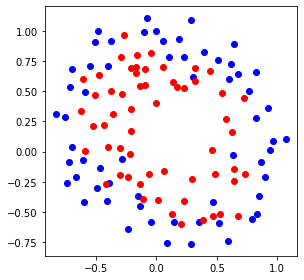

In [0]:

plt.figure()
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


##Write down the high dimensional function g(x,y;θ)
$$ 
g(x,y, \theta)=\theta_0​+\theta_1x+\theta_2y+\theta_3x^2+\theta_4y^2
$$

##Plot the training error

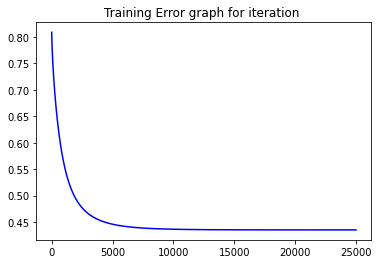

In [0]:
#J(th0, th1, th2, th3, th4, x, y)
plt.title("Training Error graph for iteration ")
plt.plot(itr, np.array(list_J), color = 'blue' )

plt.show()

##Plot the training accuracy

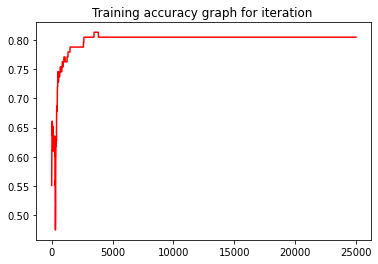

In [0]:
plt.title("Training accuracy graph for iteration ")
plt.plot(itr, np.array(list_accuracy), color = 'red' )

plt.show()

##Write down the final training accuracy

In [0]:
print("final accurary : {}%".format(round(accuracy, 3)*100))

final accurary : 80.5%


##Plot the optimal classifier superimposed on the training data 

<function matplotlib.pyplot.show>

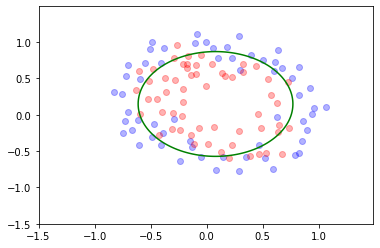

In [0]:
ax_x = np.arange(-1.5,1.5, 0.01)
ax_y = np.arange(-1.5,1.5, 0.01)
x_g, y_g = np.meshgrid(ax_x, ax_y)

plt.contour(x_g, y_g, boundary(th0, th1, th2, th3, th4, x_g, y_g), [0], colors = 'green')
plt.scatter(pointX0, pointY0, alpha=0.3, c='b')
plt.scatter(pointX1, pointY1, alpha=0.3, c='r')

plt.show

In [0]:
boundary(th0, th1, th2, th3, th4, x_g, y_g)

NameError: ignored

In [0]:

f= open('aaa.log','w')

print('1', file=f)
print('2', file=f)

f.close()



In [0]:
a = 3
print(a)

In [0]:
import numpy as np
a = 1 - np.log(0)
print(a)

inf


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


In [0]:
th0 = -1
th1 = 0
th2 = 0
th3 = 1
th4 = 1
ax_x = np.arange(-1.5,1.5, 0.01)
ax_y = np.arange(-1.5,1.5, 0.01)
x_g, y_g = np.meshgrid(ax_x, ax_y)

print(type(boundary(th0, th1, th2, th3, th4, x_g, y_g)))
print(boundary(th0, th1, th2, th3, th4, x_g, y_g).shape)

<class 'numpy.ndarray'>
(300, 300)
